In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(rc={'figure.figsize':(15, 10)})

# Základné operácie

Opäť si načítame dataset labor, ale namiesto prieskumnej analýzy, sa teraz budeme venovať hlavne čisteniu a úprave dát na numerický formát, nakoľko ML algoritmy, ktoré budeme používať, nedokážu pracovať so stringami.

In [23]:
labor = pd.read_csv('./data/labor.csv', sep='\t', index_col=0)
labor.head()

,name,ssn,relationship,leukocyty,trombocyty,erytrocyty,er-cv,smoker,hemoglobin,indicator,hbver,hematokrit,etytr,alt,weight,ast,alp
0,Christine Morris,719-19-5928,single,4.89456,4.96027,6.01413,61.49695,Y,5.93692,0.0,7.79619,5.37958,5.47919,13.72002,65.61041,34.62178,83.98761
1,Lydia Bowman,580-82-0235,single,4.39961,4.65620,5.22607,45.81785,yes,6.37683,1.0,4.60443,7.32466,4.39821,5.20215,19.75707,53.85212,88.94264
2,Trevor Leblanc,604-63-1344,single,6.46639,4.95082,5.68469,35.19715,Y,5.68526,0.0,9.69632,5.41049,3.00669,9.55954,35.70722,48.54269,84.48405
3,Barbara Galloway,762-39-0891,separated,5.52904,5.39870,5.49656,41.52287,no,5.24691,1.0,4.82470,7.44400,4.94208,6.88538,92.25024,62.47847,79.24375
4,Susan Soto PhD,436-39-7119,single,6.81428,3.68756,5.61364,54.99315,no,5.88366,1.0,4.95619,6.12667,4.32820,9.79670,61.70585,43.05721,81.97166


Vďaka `info()` sme mohli zistiť, ktoré premenné sú numerické (`float64`, `int64`), a ktoré sú kategorické(`object`, `category`):
- numerické: leukocyty, trombocyty, erytrocyty, er-cv, hemoglobin, indicator, hbver, hematokrit, etytr, alt, weight, ast, alp
- name, ssn, relationship, smoker

In [24]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10086 entries, 0 to 10085
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10086 non-null  object 
 1   ssn           10086 non-null  object 
 2   relationship  10086 non-null  object 
 3   leukocyty     10055 non-null  float64
 4   trombocyty    10056 non-null  float64
 5   erytrocyty    10056 non-null  float64
 6   er-cv         10056 non-null  float64
 7   smoker        10086 non-null  object 
 8   hemoglobin    10056 non-null  float64
 9   indicator     10086 non-null  float64
 10  hbver         10054 non-null  float64
 11  hematokrit    10055 non-null  float64
 12  etytr         10055 non-null  float64
 13  alt           10054 non-null  float64
 14  weight        10086 non-null  float64
 15  ast           10056 non-null  float64
 16  alp           10056 non-null  float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


Funkcia `describe()` vypíše základné súhrnné informácie o datasete. Výpisom je tabuľka s počtom, priemerom, odchýlkou, minimom, maximom a kvartilmi pre každú numerickú premennú. Môžeme vidieť, že premenné `er-cv`, `alt`, `ast` a `alp` dosahujú hodnoty medzi 0 a 100, takže zrejme ide o percentuálne hodnoty, `indicator` je binárna premenná a ostatné vypísané sú pravdepodobne normálne numerické premenné.

Ďalej môžeme vidieť, že väčšina premenných má chýbajúce hodnoty - väčšina má ~10 056 non-null záznamov čo sme mohli vidieť aj pri `info()`, ale `indicator` má až 10 086 záznamov. To nám napovedá, že buď chýbajú hodnoty v ostatných stĺpcoch, alebo niektoré riadky s chýbajúcimi premennými sú duplicitné.

In [25]:
labor.describe()

,leukocyty,trombocyty,erytrocyty,er-cv,hemoglobin,indicator,hbver,hematokrit,etytr,alt,weight,ast,alp
count,10055.000000,10056.000000,10056.000000,10056.000000,10056.000000,10086.000000,10054.000000,10055.000000,10055.000000,10054.000000,10086.000000,10056.000000,10056.000000
mean,5.930853,5.940500,5.942374,44.760902,5.919210,0.641087,5.566844,6.713529,4.712868,9.854021,70.204066,46.430939,70.723387
std,0.993432,1.519096,1.000544,12.571764,1.008648,0.479706,1.627346,1.368682,1.200518,3.969930,34.891008,12.078062,19.166099
min,1.872390,0.739230,2.327370,0.000000,1.835830,0.000000,0.335560,3.089560,0.000000,0.000000,-62.832600,0.000000,0.000000
25%,5.265810,4.738363,5.272195,36.211585,5.229405,0.000000,4.390142,5.730175,3.916505,7.623550,46.472550,38.227790,61.283462
50%,5.930000,5.934620,5.930605,44.733120,5.924930,1.000000,5.465535,6.851460,4.727020,9.281450,70.047050,46.427835,77.374860
75%,6.615600,7.167108,6.605710,53.327887,6.596488,1.000000,6.757352,7.686795,5.499110,11.251923,93.664050,54.784788,84.894207
max,9.585410,10.404910,10.052540,100.000000,9.880770,1.000000,10.822960,11.953570,10.600340,100.000000,210.122540,100.000000,100.000000


# Čistenie dát

Pri použití box-plotu vidíme, že v datasete labor sa nachádzajú outlieri - pre korektnú a menej chybovú neskoršiu predikciu týchto outlierov treba odstrániť. Outlieri sú znázornení čiernymi kruhmi pri danom boxplote.

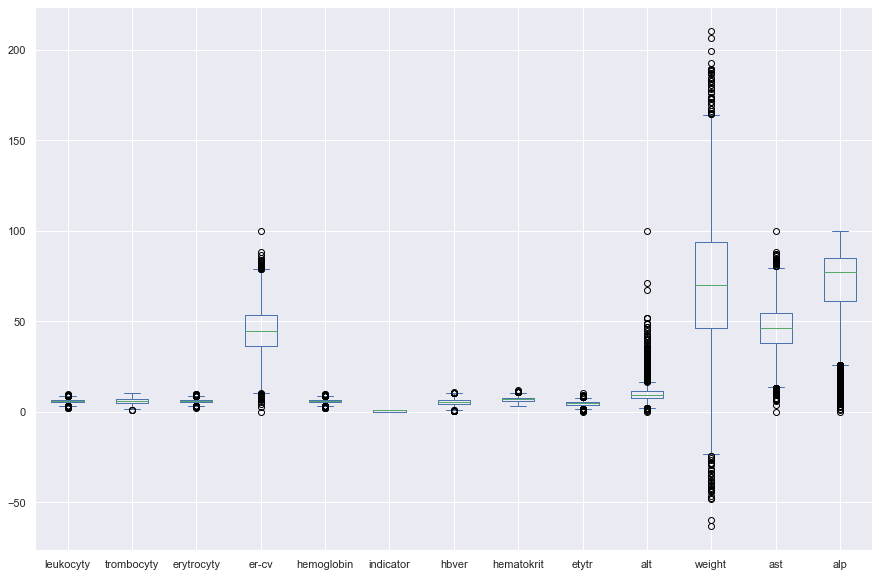

In [26]:
labor.plot.box();

Vytvoríme si funkciu `replace_outliers` ktorá nám pre zadané dáta `df` pre stĺpec `col` zistí spodný a vrchný limit, a vráti dataframe, ktorý obsahuje len dáta väčšie ako je spodný limit a zároveň menšie ako je vrchný limit

In [27]:
def replace_outliers(df, col):
    lower_limit = df[col].quantile(0.25) - 1.5 * stats.iqr(df[col], nan_policy='omit')
    upper_limit = df[col].quantile(0.75) + 1.5 * stats.iqr(df[col], nan_policy='omit')
     
    return df[(df[col] < upper_limit) & (df[col] > lower_limit)]

Uložíme si do poľa `numeric_columns` z datasetu `labor` len stĺpce ktoré obsahujú číselné hodnoty, a pre každý z týchto stĺpcov odstránime outlierov. Výsledok si priebežne ukladáme do dataframe-u labor, pričom na konci si dáme vypísať boxplot a vidíme, že outlierov sa nám úspešne podarilo odstrániť, no nakoľko sa nám vytvoril nový boxplot, outlieri boli znova prepočítaní, no vidíme že už dosahujú oveľa nižšie počty s oveľa nižším hodnotovým rozptylom.

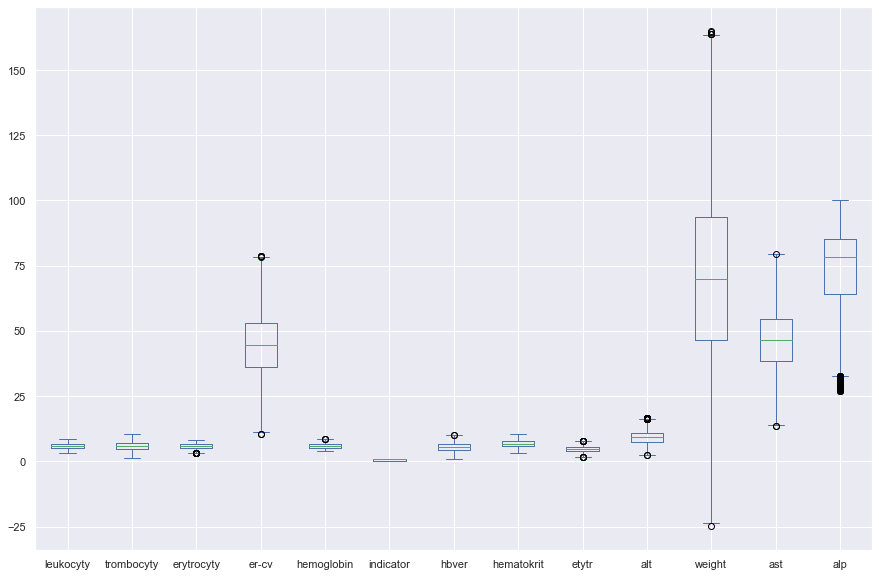

In [28]:
numeric_columns = labor.select_dtypes(include='number').columns.tolist()

for col in numeric_columns:
    labor = replace_outliers(labor, col)
    
labor.plot.box();

Vyššie sme si mohli všimnúť, že premenná `smoker` má viacero hodnôt predstavujúcich to isté, takže je potrebné dáta upraviť. Taktiež môžeme vidieť, že premenná `relationship` má chybu v 'divorced'.

In [29]:
print(labor.smoker.value_counts())
print(labor.relationship.value_counts())

no     4771
yes    1711
Y      1678
N       435
Name: smoker, dtype: int64
married      2203
divoced      2106
single       1734
widowed       871
nop           849
separated     832
Name: relationship, dtype: int64


`smoker` zatiaľ upravíme tak, aby sme mali iba dve hodnoty 'Y' a 'N', ktoré neskôr zmeníme na numerické hodnoty pomocou encodera a v `relationship` opravíme preklep. Môžeme si všimnúť hodnotu separated, ktorá pravdepodobne značí to isté, čo divorced alebo widowed. Nakoľko však nevieme s určitosťou povedať čo môže táto hodnota predstavovať, nebudeme ju zatiaľ meniť.

In [30]:
labor.smoker.replace({'yes': 'Y', 'no': 'N'}, inplace=True)
labor.relationship.replace({'divoced': 'divorced'}, inplace=True)
print(labor.smoker.value_counts())
print(labor.relationship.value_counts())

N    5206
Y    3389
Name: smoker, dtype: int64
married      2203
divorced     2106
single       1734
widowed       871
nop           849
separated     832
Name: relationship, dtype: int64


Následne môžeme skúsiť odstrániť duplikáty v dátach pomocou `drop_duplicates()`. Vidíme, že sme sa takto zbavili 77 duplicitných záznamov.

In [31]:
print('S duplikatmi:', labor.shape[0])
labor.drop_duplicates(inplace=True)
print('Bez duplikatov:', labor.shape[0])

S duplikatmi: 8595
Bez duplikatov: 8518


# Spájanie datasetov

Druhý dataset je `profiles` s menami, pohlavím, krvnou skupinou, zamestnaním a ďaľsími informáciami o pacientoch. Tabuľky `labor` a `profiles` je možné spojiť na základe mena alebo ssn, najprv si však môžeme všimnúť, že dátumy narodení sú vo viacerých formátoch, takže ich najprv musíme naformátovať.

Premenná `race` obsahuje viacero rovnakých premenných, ktoré sú napísané inak alebo s chybou, takže musíme opraviť aj tie.

In [32]:
profiles = pd.read_csv('./data/profiles.csv', sep='\t', index_col=0)
profiles.head()

,birthdate,race,residence,sex,blood_group,job,name,address,ssn
0,15 May 1993,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140
1,1982-01-27,White,"790 Hartman Fall\nSouth Cindy, KS 78171",M,B-,Data scientist,Samuel Lopez DVM,"94200 Andrew Extensions Apt. 988\nPeckview, OK...",842-70-4675
2,"02/26/1934, 00:00:00",White,"4128 Brown Overpass\nAprilshire, NC 56465",M,A-,Museum education officer,Brandon Shaw,"7915 Victoria Estate\nSouth Moniquechester, MA...",633-81-4143
3,1920/12/17,White,"365 Emily Forks Suite 960\nKevinmouth, AZ 89331",F,AB-,"Copywriter, advertising",Selena Mccoy,"47385 Newton Mountains\nNew Patrickchester, NJ...",323-46-2043
4,01 May 1993,Black,"0779 Alexander Walks\nWilliamsside, MT 89105",F,A-,"Accountant, chartered management",Brittany Wu,"65855 Ortega Square Apt. 472\nKaylaburgh, LA 4...",032-19-8452


In [33]:
profiles.race.value_counts()

White       1568
Black        712
Asian        300
Hawaiian     149
Indian       143
black         84
blsck         31
white         27
Name: race, dtype: int64

In [34]:
profiles = profiles.astype({'birthdate': 'datetime64[ns]'})
profiles.race.replace({'white': 'White', 'black': 'Black', 'blsck': 'Black'}, inplace=True)

profiles.head()

,birthdate,race,residence,sex,blood_group,job,name,address,ssn
0,1993-05-15,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140
1,1982-01-27,White,"790 Hartman Fall\nSouth Cindy, KS 78171",M,B-,Data scientist,Samuel Lopez DVM,"94200 Andrew Extensions Apt. 988\nPeckview, OK...",842-70-4675
2,1934-02-26,White,"4128 Brown Overpass\nAprilshire, NC 56465",M,A-,Museum education officer,Brandon Shaw,"7915 Victoria Estate\nSouth Moniquechester, MA...",633-81-4143
3,1920-12-17,White,"365 Emily Forks Suite 960\nKevinmouth, AZ 89331",F,AB-,"Copywriter, advertising",Selena Mccoy,"47385 Newton Mountains\nNew Patrickchester, NJ...",323-46-2043
4,1993-05-01,Black,"0779 Alexander Walks\nWilliamsside, MT 89105",F,A-,"Accountant, chartered management",Brittany Wu,"65855 Ortega Square Apt. 472\nKaylaburgh, LA 4...",032-19-8452


In [35]:
profiles.race.value_counts()

White       1595
Black        827
Asian        300
Hawaiian     149
Indian       143
Name: race, dtype: int64

`info()` nám prezradí, že nemáme žiadne chýbajúce informácie o pacientoch a teda môžeme tabuľky spojiť.

In [36]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3014 entries, 0 to 3013
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   birthdate    3014 non-null   datetime64[ns]
 1   race         3014 non-null   object        
 2   residence    3014 non-null   object        
 3   sex          3014 non-null   object        
 4   blood_group  3014 non-null   object        
 5   job          3014 non-null   object        
 6   name         3014 non-null   object        
 7   address      3014 non-null   object        
 8   ssn          3014 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 235.5+ KB


Následne si spojíme dané datasety `profiles` a `labor` nad stĺpcom `ssn` a skúsime si pozrieť výsledok pomocou metódy `.head()`

In [42]:
data = pd.merge(profiles, labor, on='ssn')
data.head()

,birthdate,race,residence,sex,blood_group,job,name_x,address,ssn,name_y,...,smoker,hemoglobin,indicator,hbver,hematokrit,etytr,alt,weight,ast,alp
0,1993-05-15,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140,Cody Nichols,...,Y,6.20104,1.0,5.72910,6.28141,5.57331,7.88495,96.00178,40.86637,92.95088
1,1993-05-15,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140,Cody Nichols,...,N,6.84822,1.0,4.99456,6.21007,5.29406,16.08389,77.37310,53.22156,78.70403
2,1993-05-15,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140,Cody Nichols,...,Y,5.56122,0.0,7.24767,7.86849,3.56027,8.59896,90.98818,40.24442,74.74658
3,1993-05-15,White,"654 Murray Green\nEast Ritafort, IA 01722",M,B-,"Psychotherapist, dance movement",Cody Nichols,Unit 8840 Box 8642\nDPO AA 87697,094-80-9140,Cody Nichols,...,N,5.55743,0.0,8.40582,6.12377,3.95634,8.88687,72.28064,69.17860,75.38968
4,1982-01-27,White,"790 Hartman Fall\nSouth Cindy, KS 78171",M,B-,Data scientist,Samuel Lopez DVM,"94200 Andrew Extensions Apt. 988\nPeckview, OK...",842-70-4675,Samuel Lopez DVM,...,N,6.33734,1.0,2.81548,9.16394,6.44778,7.05226,120.99815,47.15587,89.42285


Počet záznamov sa nám nezmenil, čo je dobré znamenie, že sme nemali pacientov v `profiles`, ktorí nemajú záznam v `labor`.

In [43]:
print(data.shape)
data.info()

(8518, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 8517
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   birthdate     8518 non-null   datetime64[ns]
 1   race          8518 non-null   object        
 2   residence     8518 non-null   object        
 3   sex           8518 non-null   object        
 4   blood_group   8518 non-null   object        
 5   job           8518 non-null   object        
 6   name_x        8518 non-null   object        
 7   address       8518 non-null   object        
 8   ssn           8518 non-null   object        
 9   name_y        8518 non-null   object        
 10  relationship  8518 non-null   object        
 11  leukocyty     8518 non-null   float64       
 12  trombocyty    8518 non-null   float64       
 13  erytrocyty    8518 non-null   float64       
 14  er-cv         8518 non-null   float64       
 15  smoker        8518 non-null

Teraz môžeme odstrániť stĺpce, ktoré nepovažujeme za dôležité. Meno, práca a adresa pre nás nie sú zaujímavé, takže ich odstránime. Keďže sa meno nachádzalo v oboch tabuľkách, máme tam dva stĺpce `name_x` a `name_y`. Ďalšou premennou, ktorú môžeme odstrániť je `relationship` a `ssn`, ktorý sme použili na spájanie, ale už ho ďalej nepotrebujeme.

In [44]:
data.drop(['name_x', 'name_y', 'job', 'address', 'residence', 'relationship', 'ssn'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 8517
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   birthdate    8518 non-null   datetime64[ns]
 1   race         8518 non-null   object        
 2   sex          8518 non-null   object        
 3   blood_group  8518 non-null   object        
 4   leukocyty    8518 non-null   float64       
 5   trombocyty   8518 non-null   float64       
 6   erytrocyty   8518 non-null   float64       
 7   er-cv        8518 non-null   float64       
 8   smoker       8518 non-null   object        
 9   hemoglobin   8518 non-null   float64       
 10  indicator    8518 non-null   float64       
 11  hbver        8518 non-null   float64       
 12  hematokrit   8518 non-null   float64       
 13  etytr        8518 non-null   float64       
 14  alt          8518 non-null   float64       
 15  weight       8518 non-null   float64       
 16  ast   

Vidíme, že nám zostali štyri kategorické premenné `race`, `sex`, `blood_group` a `smoker`. Premenná `blood_group` obsahuje 8 rôznych hodnôt - štyri krvné skupiny, pričom každá môže byť pozitív alebo negatív. Pre zníženie počtu stĺpcov v datasete po encodingu, môžeme spojiť pozitívne a negatívne varianty do jednej skupiny.

In [45]:
print(data.blood_group.value_counts())
data.blood_group.replace({'A+': 'A', 'A-': 'A', 'B+': 'B', 'B-': 'B','O+': 'O', 'O-': 'O','AB+': 'AB', 'AB-': 'AB'}, inplace=True)
data.blood_group.value_counts()

B-     1156
O-     1128
A-     1082
AB+    1080
AB-    1063
O+     1051
B+      993
A+      965
Name: blood_group, dtype: int64


O     2179
B     2149
AB    2143
A     2047
Name: blood_group, dtype: int64

Ďalšia premenná, ktorú je potrebné upraviť je `birthdate`. Z tejto premennej môžeme získať vek pacienta, ktorý môže byť dôležitý pre analýzu, takže od dnešného dátumu odčítame dátum narodenia pacienta a premeníme rozdiel na roky.

In [46]:
data['year'] = ((pd.to_datetime('today') - data.birthdate) / np.timedelta64(1, 'Y')).astype('int64')
data.drop(['birthdate'], axis=1, inplace=True)

Ďalej môžeme zakódovať kategorické premenné do numerických. V tomto prípade existuje viacero encoderov, každý na iný druh premenných. Môžeme použiť OrdinalEncoder, ktorý hodnoty zakóduje v jednom stĺpci. Tento encoder je vhodný ak  máme premennú, ktorej hodnoty sa dajú zoradiť, napríklad stupeň vzdelania: základné - 1, stredoškolské s maturitou - 2, bakalárske - 3, a pod.

Ak sa hodnoty zoradiť nedajú vhodnejší je OneHotEncoder, ktorý pre každú premennú vytvorí samostatný stĺpec s binárnou hodnotou 0, ak dané pozorovanie nepatrí a 1 ak patrí do danej kategórie. Nevýhodou OneHotEncodera je, že ak kóduje premennú s mnohými rôznymi hodnotami, vznikne nám veľké množstvo nových stĺpcov.

Keďže ideme kódovať viacero premenných, môžeme si vytvoriť funkciu. Okrem toho si vytvoríme kópiu datasetu `temp`, aby sme si potom mohli ukázať lepší spôsob ako transformovať premenné pomocou zopár riadkov.

In [47]:
from sklearn.preprocessing import OneHotEncoder

def OH_encode_column(data, column):
    OH_encoder = OneHotEncoder(sparse=False)
    result = pd.DataFrame(OH_encoder.fit_transform(data[[column]]))

    cols = [(column + '_' + col.lower()) for col in OH_encoder.categories_[0]]
    result.columns = cols
    
    data = pd.concat([data, result], axis=1)
    data.drop(column, axis=1, inplace=True)
    
    return data

In [48]:
columns = ['sex', 'race', 'smoker', 'blood_group']
temp = data.copy()

for col in columns:
    temp = OH_encode_column(temp, col)

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 8517
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   leukocyty       8518 non-null   float64
 1   trombocyty      8518 non-null   float64
 2   erytrocyty      8518 non-null   float64
 3   er-cv           8518 non-null   float64
 4   hemoglobin      8518 non-null   float64
 5   indicator       8518 non-null   float64
 6   hbver           8518 non-null   float64
 7   hematokrit      8518 non-null   float64
 8   etytr           8518 non-null   float64
 9   alt             8518 non-null   float64
 10  weight          8518 non-null   float64
 11  ast             8518 non-null   float64
 12  alp             8518 non-null   float64
 13  year            8518 non-null   int64  
 14  sex_f           8518 non-null   float64
 15  sex_m           8518 non-null   float64
 16  race_asian      8518 non-null   float64
 17  race_black      8518 non-null   f

Všetky hodnoty už máme numerické, teraz zostáva vyriešiť chýbajúce hodnoty. Na to existuje viacero rôznych techník od odstraňovania riadkov, až po imputáciu pomocou KNN algoritmu.

Odstraňovanie riadkov vo všeobecnosti nie je považované za vhodnú techniku nakoľko môžeme strácať dôležité informácie. Môžeme teda použiť nejaký spôsob imputácie chýbajúcich hodnôt. Medzi najčastejšie patrí vloženie priemeru , mediánu alebo modusu ostatných hodnôt zo stĺpca do chýbajúcich pozorovaní. Táto technika je vo väčšine prípadov dostačujúca, ale samozrejme všetky chýbajúce hodnoty budú mať po imputácii rovnaké hodnoty.

Môžeme teda vyskúšať KNNImputer, ktorý vloží do chýbajúcich hodnôt priemer z `n` najbližších susedov. Tento algoritmus dokáže spracovať celý dataframe, ale odstáni názvy stĺpcov, takže tie si predtým uložíme a po transformácii ich opätovne pridáme.

In [49]:
from sklearn.impute import KNNImputer

cols = temp.columns

imputer = KNNImputer(n_neighbors=3)
temp = pd.DataFrame(imputer.fit_transform(temp))
temp.columns = cols

#temp.fillna(temp.mean(), inplace=True)
#temp.fillna(temp.median(), inplace=True)
#temp.fillna(temp.mode(), inplace=True)

temp.isna().sum()

leukocyty         0
trombocyty        0
erytrocyty        0
er-cv             0
hemoglobin        0
indicator         0
hbver             0
hematokrit        0
etytr             0
alt               0
weight            0
ast               0
alp               0
year              0
sex_f             0
sex_m             0
race_asian        0
race_black        0
race_hawaiian     0
race_indian       0
race_white        0
smoker_n          0
smoker_y          0
blood_group_a     0
blood_group_ab    0
blood_group_b     0
blood_group_o     0
dtype: int64

Teraz môžeme prejsť na škálovanie hodnôt. Pri `describe()` sme spomínali, že premenné `er-cv`, `alt`, `ast` a `alp` sú pravdepodobne percentuálne premenné nakoľko dosahujú hodnoty medzi 0 a 100. Tieto premenné môžeme preškálovať na interval <0, 1> pomocou MinMaxScaler.

In [50]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

scaled = pd.DataFrame(scaler.fit_transform(temp[['er-cv', 'alt', 'ast', 'alp']]))
temp.drop(['er-cv', 'alt', 'ast', 'alp'], axis=1, inplace=True)

scaled.columns = ['er-cv', 'alt', 'ast', 'alp']
temp = pd.concat([temp, scaled], axis=1)

temp[['er-cv', 'alt', 'ast', 'alp']]

,er-cv,alt,ast,alp
0,0.617865,0.386248,0.414778,0.903423
1,0.106503,0.960067,0.602364,0.708232
2,0.531813,0.436219,0.405335,0.654013
3,0.648422,0.456369,0.844637,0.662824
4,0.702616,0.327970,0.510270,0.855087
...,...,...,...,...
8513,0.594542,0.370953,0.217036,0.730489
8514,0.272481,0.571739,0.622274,0.760880
8515,0.386939,0.554488,0.542018,0.424639
8516,0.114247,0.214080,0.515117,0.817984


Takto upravený dataset si môžeme uložiť do .csv súboru, aby sme nemuseli všetky úpravy robiť nanovo pri každom spustení notebooku.

In [51]:
temp.to_csv('data/clean.csv')

# Rozdelenie datasetu a transformácie

Operácie, ktoré sme práve vykonali môžeme urobiť oveľa jednoduchšie a prehľadnejšie pomocou pipeline. Dáta si predtým rozdelíme na trénovaciu a testovaciu skupinu pomocou `train_test_split`. Predtým si musíme extrahovať prediktor z datasetu, ktorý uložíme do premennej `y` - v našom prípade je to premenná `indicator`. Zvyšok datasetu uložíme do premennej `X`.

Samozrejme, nie všetky stĺpce sú vhodné na predikciu premennej `indicator`, takže predtým ako dataset rozdelíme, vyberieme si najreprezentatívnejšie stĺpce pomocou feature selection techník.

In [52]:
y = data.indicator
X = data.drop(['indicator'], axis=1)

X.head()

,race,sex,blood_group,leukocyty,trombocyty,erytrocyty,er-cv,smoker,hemoglobin,hbver,hematokrit,etytr,alt,weight,ast,alp,year
0,White,M,B,5.92098,6.32373,6.01221,52.70252,Y,6.20104,5.72910,6.28141,5.57331,7.88495,96.00178,40.86637,92.95088,28
1,White,M,B,6.44611,8.09081,7.98103,17.87103,N,6.84822,4.99456,6.21007,5.29406,16.08389,77.37310,53.22156,78.70403,28
2,White,M,B,6.59650,4.21819,5.02297,46.84106,Y,5.56122,7.24767,7.86849,3.56027,8.59896,90.98818,40.24442,74.74658,28
3,White,M,B,7.90233,4.44012,6.78578,54.78386,N,5.55743,8.40582,6.12377,3.95634,8.88687,72.28064,69.17860,75.38968,28
4,White,M,B,6.28097,4.69305,5.12352,58.47531,N,6.33734,2.81548,9.16394,6.44778,7.05226,120.99815,47.15587,89.42285,39


Na výber vhodných stĺpcov použijeme `SelectKBest`, ktorý však potrebuje aby všetky premenné boli numerické. V tomto prípade nie je vhodné použiť OneHot, nakoľko algoritmus môže vybrať jednu kategóriu spomedzi viacerých, ktoré boli predtým v jednom stĺpci. Preto teraz použijeme `OrdinalEncoder`, aby sme kategorické premenné iba premenili na numerické a celý dataset pošleme do feature selection algortimu.

`SelectKBest` môže používať viacero rôznych metód, napríklad `f_regression`, `mutual_info_regression` alebo `chi2`, ktorý však v tomto prípade nemôžeme použiť, lebo v datasete sú aj stĺpce so zápornými hodnotami, takže vyskúšame prvé dva.

Algoritmus automaticky vyberie `k` najdôležitejších premenných, no ak ich chceme aj zoradiť, môžeme si extrahovať `scores_` z natrénovaného selectoru. Čím vyššia hodnota stĺpca, tým je premenná reprezentatívnejšia. Môžeme pozorovať, že obe metódy označili `hbver` a `hematokrit` ako výrazne reprezentatívnejšie ako ostatné stĺpce, a potom `f_regression` vybral `weight`, `er-cv` a `hemoglobin`, zatiaľ čo `mutual_info_regression` vybral `trombocyty`, `er-cv` a `blood_group`.

My sa budeme riadiť výsledkami z `f_regression` a vyberieme nasledovné stĺpce zoradené zostupne podľa dôležitosti:

1. `hbver`
2. `hematokrit`
3. `weight`
4. `er-cv`
5. `hemoglobin`

In [53]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

categoric_features = X.select_dtypes(exclude='number').columns.tolist()

new_cols = pd.DataFrame(OrdinalEncoder().fit_transform(X[categoric_features]), columns=categoric_features)

temp = X.drop(categoric_features, axis=1)
X_temp = pd.concat([temp, new_cols], axis=1)
cols = X_temp.columns

fr_selector = SelectKBest(f_regression, k=5)
mir_selector = SelectKBest(mutual_info_regression, k=5)
# chi_selector = SelectKBest(chi2, k=5)

fr_selected = fr_selector.fit_transform(X_temp, y)
mir_selected = mir_selector.fit_transform(X_temp, y)
# chi_selected = chi_selector.fit_transform(X_temp, y)

pd.DataFrame({'f_regression': fr_selector.scores_, 'mutual_info': mir_selector.scores_}, index=cols)

,f_regression,mutual_info
leukocyty,0.000056,0.000675
trombocyty,0.734161,0.027477
erytrocyty,0.573120,0.000000
er-cv,1.136176,0.015676
hemoglobin,1.069884,0.000000
hbver,6825.110927,0.287490
hematokrit,1711.332244,0.136844
etytr,0.172375,0.000000
alt,0.162420,0.000000
weight,2.341208,0.000870


V `train_test_split` môžeme definovať veľkosť testovacej skupiny, my sme nastavili, že trénovacia skupina bude tvoriť 80% a testovacia 20% datasetu. Taktiež sme nastavili `random_state` aby  sme vedeli replikovať rozdelenie do skupín. Z X si vyberieme iba stĺpce z feature_selection, aby sme nemuseli pracovať so zbytočne veľkým datasetom.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['er-cv', 'hemoglobin', 'hbver', 'hematokrit', 'weight']], y, test_size=0.2, random_state=42)

Ďalej si vytvoríme samostatný pipeline pre numerické premenné, ktoré budeme imputovať a škálovať, a pipeline pre kategorické premenné, ktoré budeme imputovať a kódovať do numerických premenných.

Na imputáciu v tomto prípade použijeme SimpleImputer, ktorý by mal byť postačujúci na úlohu, ktorú potrebujeme splniť. Imputer používa stratégiu 'mean', takže chýbajúce premenné budú vyplnené priemerom daného stĺpca. Následne sa všetky premenné preškálujú pomocou MinMaxScaler na interval <0, 1>. Tento interval sa dá zmeniť alebo môžeme použiť StandardScaler, ktorý na každý stĺpec aplikuje vzorec $z = \frac{x - \overline{x}}{s}$, kde $\overline{x}$ je priemer  a $s$ je štandardná odchýlka stĺpca.

Pre kategorické premenné použijeme imputáciu so stratégiou 'most_frequent', takže chýbajúce hodnoty budú vyplnené najčastejšou hodnotou v stĺpci. OneHotEncoder, rovnako ako predtým, zakóduje každú hodnotu v stĺpci do samostatného stĺpca s binárnou hodnotou áno-nie.

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

Výsledkom máme dve pipeline, ktoré však nemajú posunuté žiadne dáta. Okrem toho samotná pipeline nedokáže zistiť s akými stĺpcami má pracovať. Na to použijeme ColumnTransformer, pri ktorom môžeme definovať na aké premenné chceme použiť daný pipeline.

Predtým si vyberieme do samostatných polí, ktoré premenné sú numerické, a ktoré sú kategorické, a tieto polia posunieme do ColumnsTransformera.

In [56]:
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
categoric_features = X_train.select_dtypes(exclude='number').columns.tolist()

print(numeric_features)
print(categoric_features)
X_train.info()

['er-cv', 'hemoglobin', 'hbver', 'hematokrit', 'weight']
[]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6814 entries, 6289 to 7270
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   er-cv       6814 non-null   float64
 1   hemoglobin  6814 non-null   float64
 2   hbver       6814 non-null   float64
 3   hematokrit  6814 non-null   float64
 4   weight      6814 non-null   float64
dtypes: float64(5)
memory usage: 319.4 KB


In [57]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numeric_features),
    ('category', categorical_pipeline, categoric_features)
])

X_train_transformed = pd.DataFrame(full_processor.fit_transform(X_train), index=X_train.index)
X_train_transformed

,0,1,2,3,4
6289,0.442702,0.395137,0.538920,0.586982,0.496804
549,0.332474,0.134210,0.450919,0.758853,0.479178
4707,0.770363,0.290815,0.436752,0.685388,0.826102
764,0.379951,0.649711,0.629717,0.249821,0.397311
6861,0.209590,0.318906,0.674777,0.586803,0.569239
...,...,...,...,...,...
5734,0.708144,0.554586,0.195417,0.651323,0.667740
5191,0.396380,0.950776,0.323932,0.634696,0.454430
5390,0.364240,0.594460,0.433011,0.641636,0.424734
860,0.364191,0.295530,0.176978,0.622511,0.421941


Výsledkom máme upravený a preškálovaný dataset bez chýbajúcich hodnôt, pripravený na fitovanie do modelu strojového učenia. Môžeme si všimnúť, že sa nám stratili názvy stĺpcov, čo však neprekáža nakoľko pipeline je vo všeobecnosti zakončená modelom, ktorý aj tak vráti natrénovaný model bez samotných hodnôt, a teda názvy stĺpcov nepotrebuje.

Takto vieme jednoducho a prehľadne transformovať aj veľké množstvo dát pomocou pár riadkov a najlepšie je, že vieme tento istý pipeline použiť aj na testovací dataset pridaním iba jedného riadku:

In [58]:
X_test_transformed = pd.DataFrame(full_processor.fit_transform(X_test), index=X_test.index)
X_test_transformed

,0,1,2,3,4
7497,0.569253,0.294767,0.291173,0.743867,0.430341
5257,0.456259,0.418390,0.727707,0.605020,0.410361
2571,0.428084,0.093875,0.613247,0.549592,0.366625
1084,0.310304,0.366779,0.377033,0.332041,0.292252
856,0.516112,0.294007,0.342577,0.689111,0.817759
...,...,...,...,...,...
7036,0.270338,0.586216,0.480604,0.580981,0.692551
7199,0.394971,0.813726,0.589320,0.597535,0.736091
4581,0.416813,0.706833,0.441805,0.441628,0.662329
4925,0.536627,0.408258,0.586404,0.660176,0.439603


Teraz si môžeme datasety uložiť, aby sme nabudúce nemuseli robiť všetko odznovu a môžeme pokračovať na trénovanie modelu strojového učenia.

In [59]:
pd.concat([X_train_transformed, y_train], axis=1).to_csv('./data/train.csv')
pd.concat([X_test_transformed, y_test], axis=1).to_csv('./data/test.csv')